# Directory, Libraries and Data

In [1]:
#Dependencies
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Spam E-mail Data
## Description
The data consist of 4601 email items, of which 1813 items were identified as spam.
### Usage
* spam7

### Format
This data frame contains the following columns:
* crl.tot
  * total length of words in capitals
* dollar
  * number of occurrences of the \$ symbol
* bang
  * number of occurrences of the ! symbol
* money
  * number of occurrences of the word ‘money’
* n000
  * number of occurrences of the string ‘000’
* make
  * number of occurrences of the word ‘make’
* yesno
  * outcome variable, a factor with levels n not spam, y spam

In [2]:
#Load the Data
df = pd.read_csv('/kaggle/input/spam-dataset/spam.csv')
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


# Data Analysis

In [3]:
#summary statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

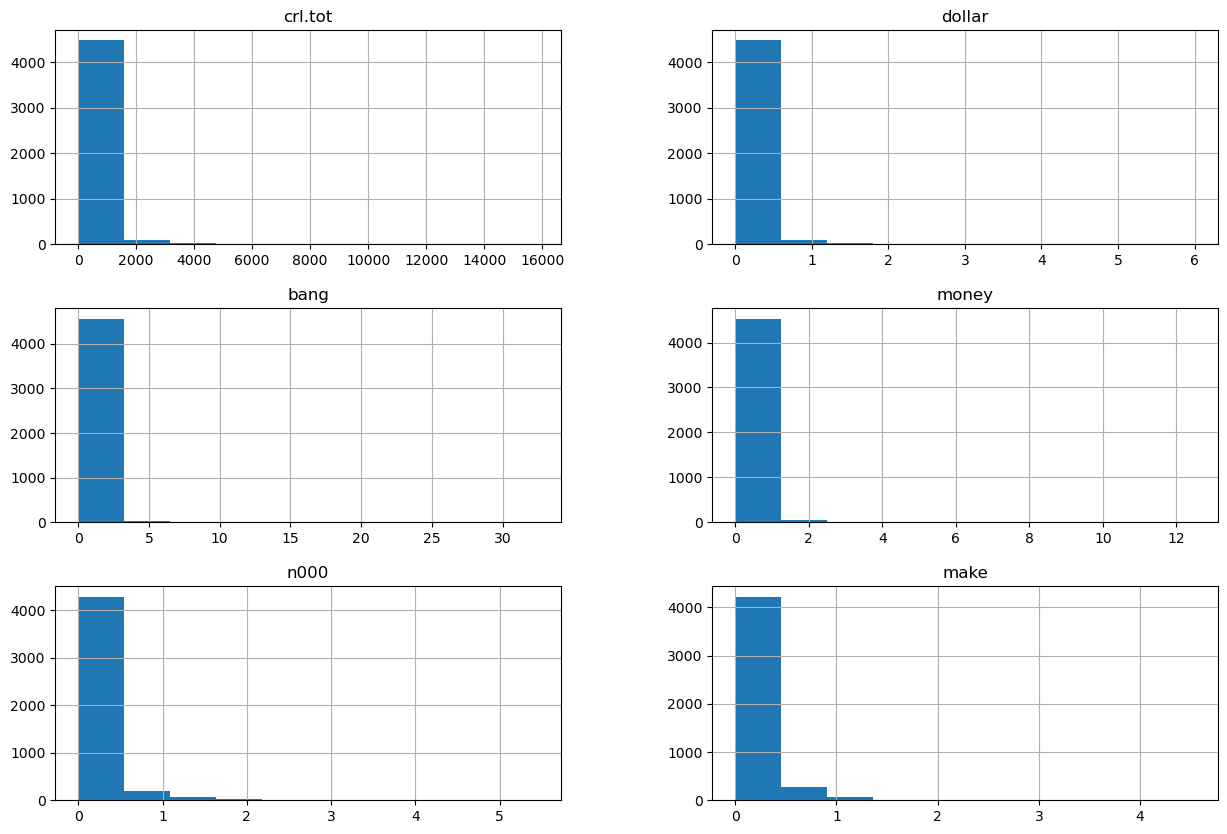

In [4]:
#histograms
df.hist(figsize = (15,10))

In [5]:
#removing outliers
print(len(df))
df = df[df['crl.tot'] < 1500]
df = df[df['bang'] < 5]
df = df[df['money'] < 6]

print(len(df))

4601
4432


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

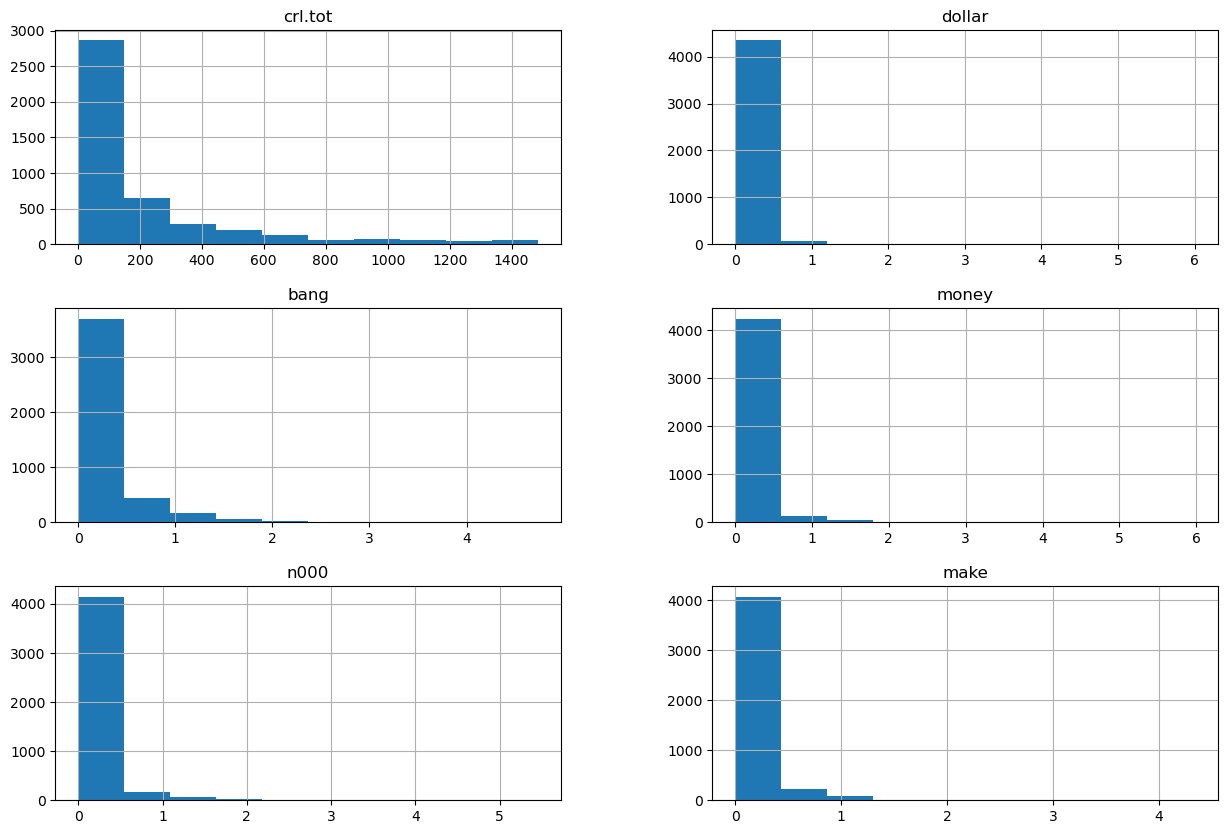

In [6]:
#histograms
df.hist(figsize = (15,10))

/tmp/ipykernel_19/2309939974.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

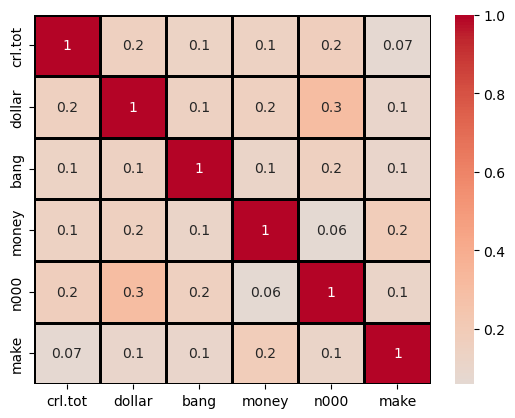

In [7]:
#Correlation Matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

# Logistic Regression Preperation

In [8]:
#Prepare Dependent Variable
df['yesno'] = np.where(df['yesno'] == 'y', 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


In [9]:
#Prepare the X and y
y = df.yesno
X = df.iloc[:,:-1]
X = sm.add_constant(X)

In [10]:
#Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

# Logistic Regression

In [11]:
#Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.4210
Time:                        18:17:37   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [12]:
#Create the Function
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient) - 1) * 100, 1)
  if probability > 0:
    print('The likelihood increases by', probability, '%')
  elif probability == 0:
    print('No Impact')
  else:
    print('The likelihood decreases by', probability, '%')

In [13]:
#Apply the Function
logistic_reader(0.0216)

The likelihood increases by 2.2 %


# Assess the Model

In [14]:
#Predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [15]:
#Check if the dataset is balanced
y_test.mean()

0.35400225479143177

In [16]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [17]:
print(f'''
      False Postives : {fp}
      False Negataives: {fn}
      True Positives: {tp}
      True Negatives: {tn}
      ''')


      False Postives : 49
      False Negataives: 102
      True Positives: 212
      True Negatives: 524
      


In [18]:
#Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy:', round(accuracy * 100, 1), '%')

#F1 Score
f1 = 2*tp / (2 * tp + fn + fp)
print('F1 Score:', round(f1 * 100, 1), '%')

#Specificity
specifity = tn / (tn + fp)
print('Specifity:', round(specifity * 100, 1), '%')

#Sensitivity
sensitivity = tp / (tp + fn)
print('Sensitivity:', round(sensitivity * 100, 1), '%')

Accuracy: 83.0 %
F1 Score: 73.7 %
Specifity: 91.4 %
Sensitivity: 67.5 %


In [19]:
#F1 Score
f1 = 2*tp / (2 * tp + fn + fp)
print('F1 Score:', round(f1 * 100, 1), '%')

F1 Score: 73.7 %


In [20]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

